# Recognition tables with text
variant 4

In [1]:
name_jpg = 'doc00030020210414100706_001.jpg'

In [2]:
%matplotlib inline
import pytesseract
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
def show_image (img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

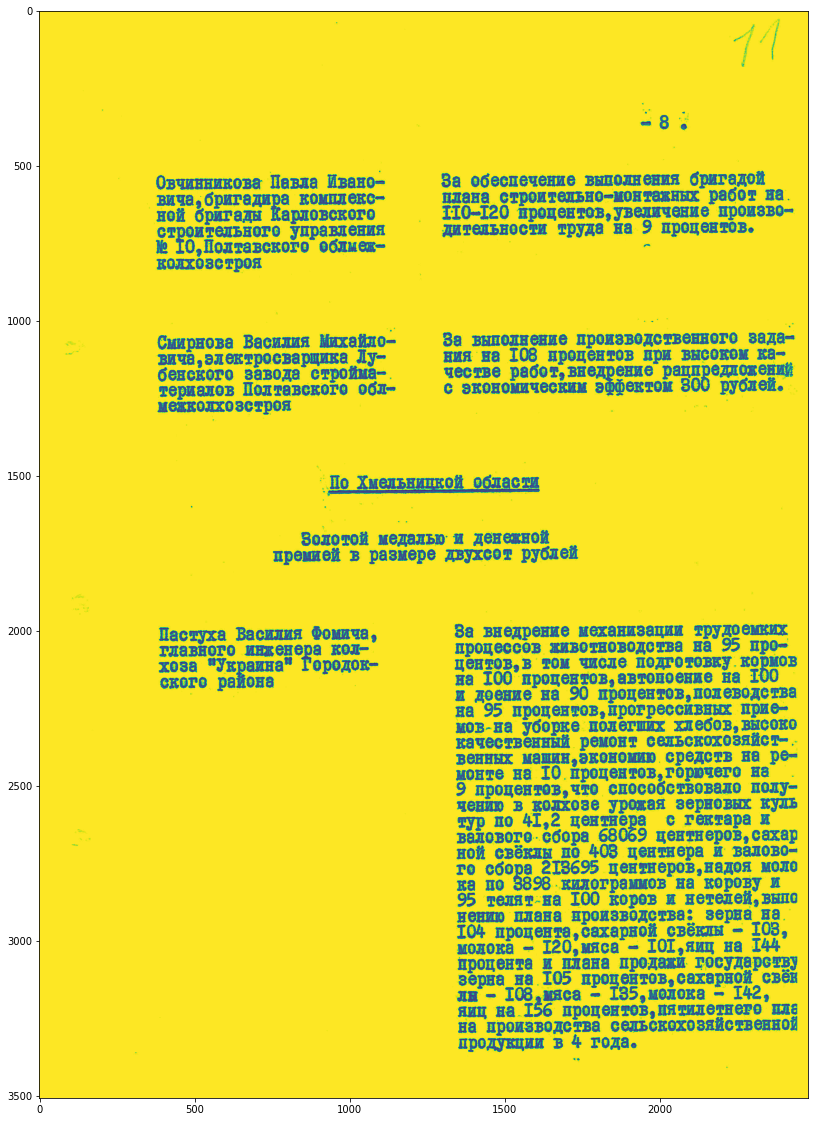

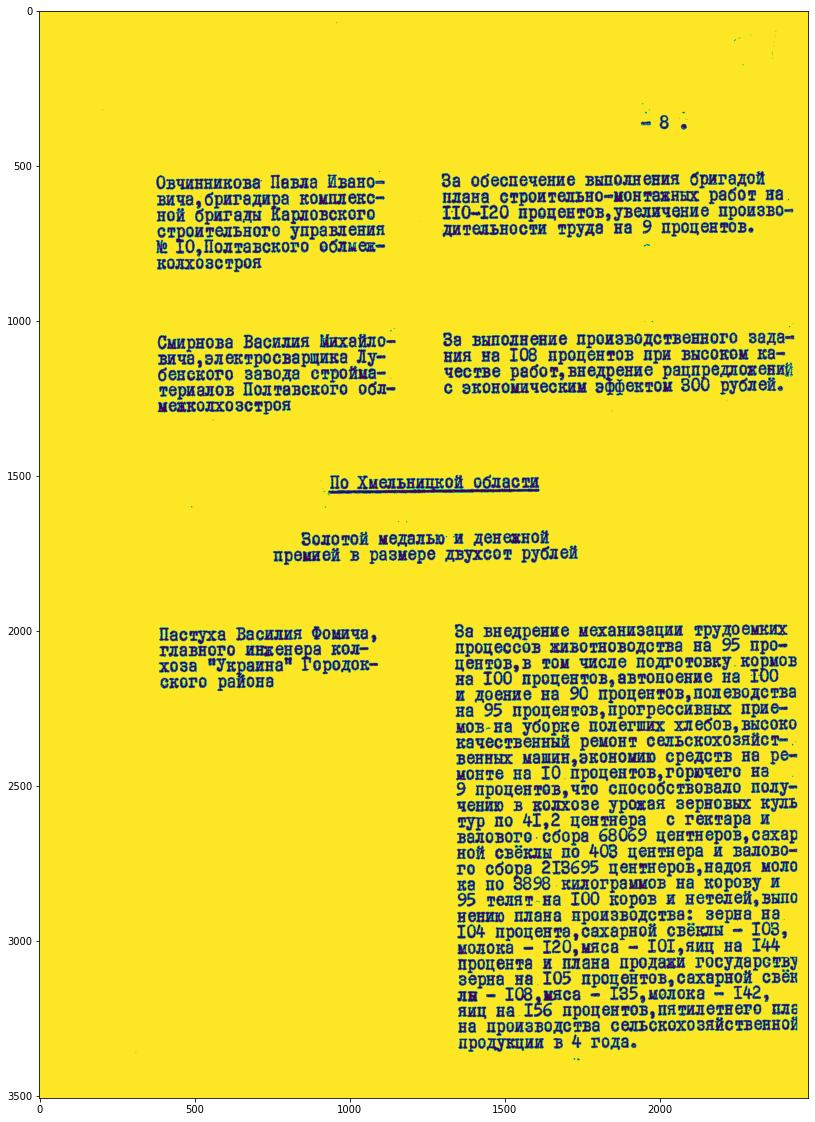

In [4]:
gray = cv2.imread(name_jpg, 0)
show_image(gray)
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
ret, threshold_gray = cv2.threshold(gray, 120, 255, 0)
show_image(threshold_gray)

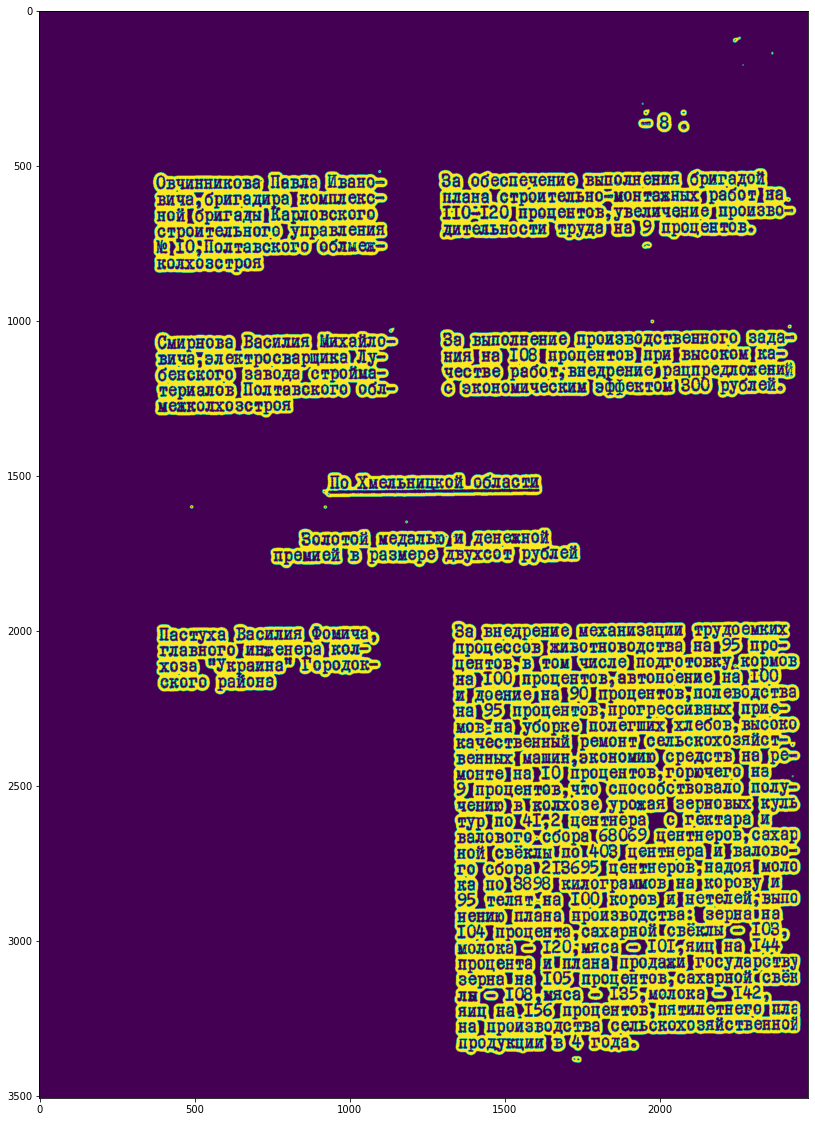

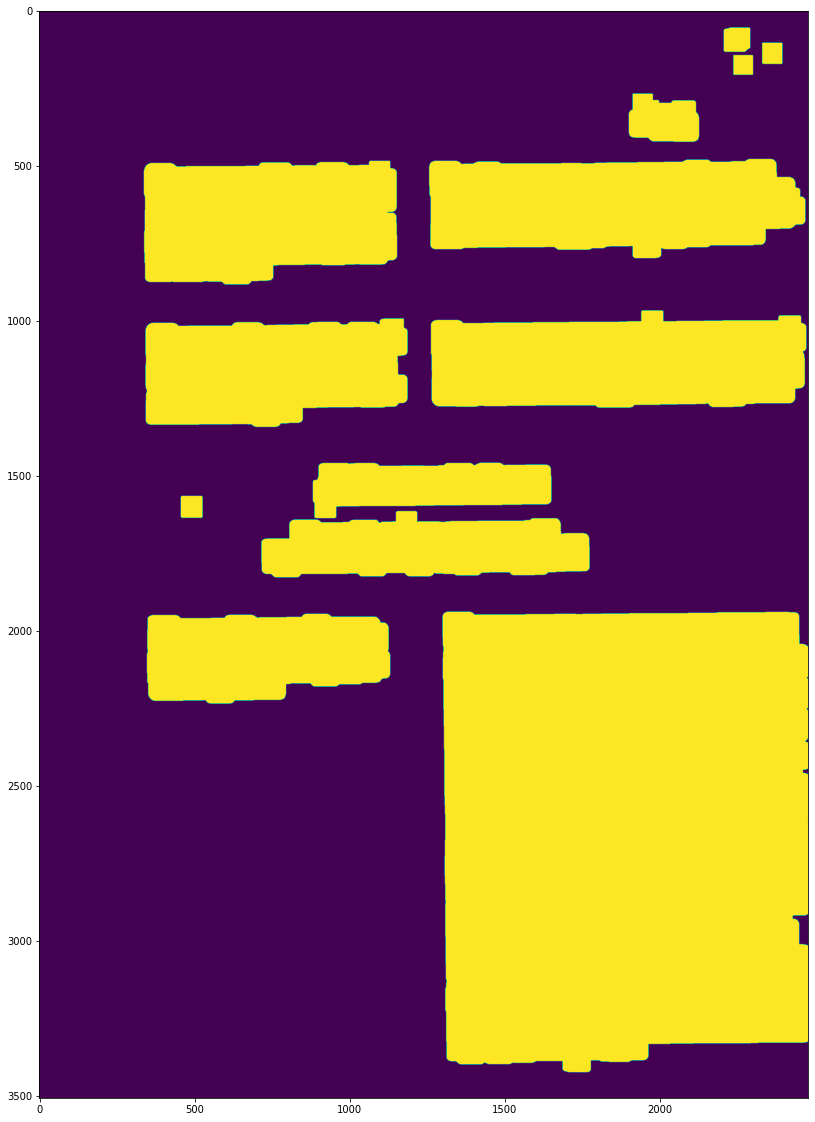

In [5]:
binary = cv2.adaptiveThreshold(threshold_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, -5)
# Show pictures 
show_image(binary)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
dilation = cv2.dilate(binary,kernel,iterations = 6)
show_image(dilation)

[[348, 1946, 785, 290], [1301, 1939, 1179, 1485], [717, 1615, 1059, 214], [883, 1459, 770, 179], [343, 994, 846, 350], [1264, 968, 1211, 314], [338, 486, 817, 399], [1258, 480, 1214, 320], [1902, 269, 227, 156]]
9


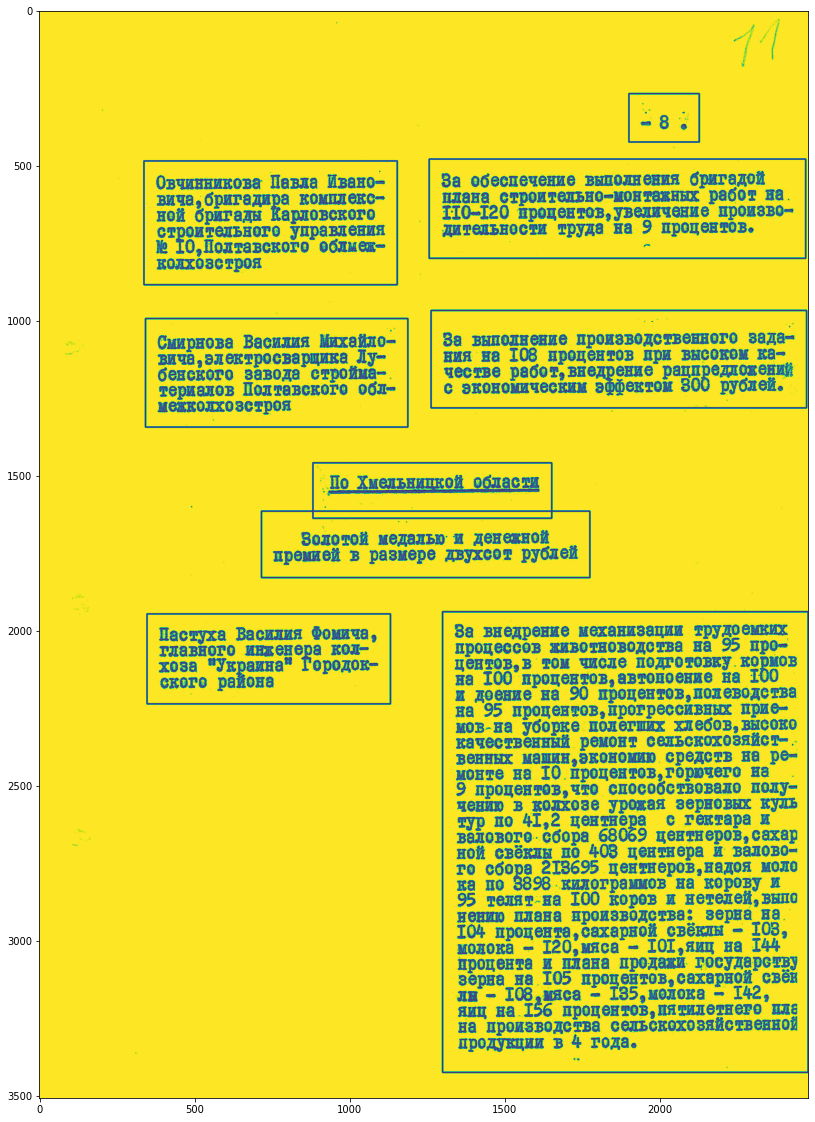

In [6]:
# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ddd = gray.copy()
ROI_number = 0
list_contur_num = []
list_contur_coord = []
k = -1
for c in cnts:
    area = cv2.contourArea(c)
    k += 1 
    if area > 10000:
        list_contur_num.append(k)
        x,y,w,h = cv2.boundingRect(c)
        list_contur_coord.append([x,y,w,h])
        cv2.rectangle(ddd, (x, y), (x + w, y + h), (36,255,12), 3)
        # ROI = image[y:y+h, x:x+w]
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1
print(list_contur_coord)
print(len(list_contur_coord))
show_image(ddd)

In [14]:
def def_text(out_i, file_text, file_fragment_text):
#     #percent by which the image is resized
#     scale_percent = 20

#     #calculate the 50 percent of original dimensions
#     width = int(out_im.shape[1] * (scale_percent) / 100)
#     height = int(out_im.shape[0] * (scale_percent) / 100)

#     # dsize
#     dsize = (width, height)

#     # resize image
#     out = cv2.resize(out_im, dsize, interpolation = cv2.INTER_LANCZOS4)
    out = cv2.morphologyEx(out_i, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(1,1)))
    show_image(out)
    d = pytesseract.image_to_data(out, output_type=pytesseract.Output.DICT, lang="rus")
    n_boxes = len(d['level'])
    print(n_boxes)
    print(d['text'])
    text = ' '.join([kk for kk in d['text'] if len(kk.strip()) > 0])
    text = text.replace('\n',' ').replace('- ','')
    print(text)
    if len(text.strip())>0:
        file_text.write(text.strip() + '\n')
    img_rez = out.copy()
    #file_mistakes = open('file_mistakes2.txt','a')
    for i in range(n_boxes):
        (t, x, y, w, h) = (d['text'][i],d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
        img_rez = cv2.rectangle(img_rez, (x, y), (x + w, y + h), (0, 255, 0), 1)
        t = t.strip().replace('|','').replace('.','').replace('--','').replace('—-','').replace('”','')
        if len(t)>0 and len(t)< 15:# and not t.isdigit():
            print(t, x, y, w, h, sep=' | ')
            file_fragment_text.write('|'.join([t, str(x), str(y), str(w), str(h)]) + '\n')
            #file_mistakes.write(t+'\n'))

In [15]:
def string_recog(in_img):
    ret, threshold_gray2 = cv2.threshold(in_img, 120, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    ## (5) find and draw the upper and lower boundary of each lines
    hist = cv2.reduce(threshold_gray2,1, cv2.REDUCE_AVG).reshape(-1)
    print(hist)
    th = 15
    H,W = in_img.shape[:2]
    uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
    lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]
    rotated = cv2.cvtColor(threshold_gray2, cv2.COLOR_GRAY2BGR)
    for y in uppers:
        cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

    for y in lowers:
        cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)
    show_image(rotated)
    return uppers,lowers

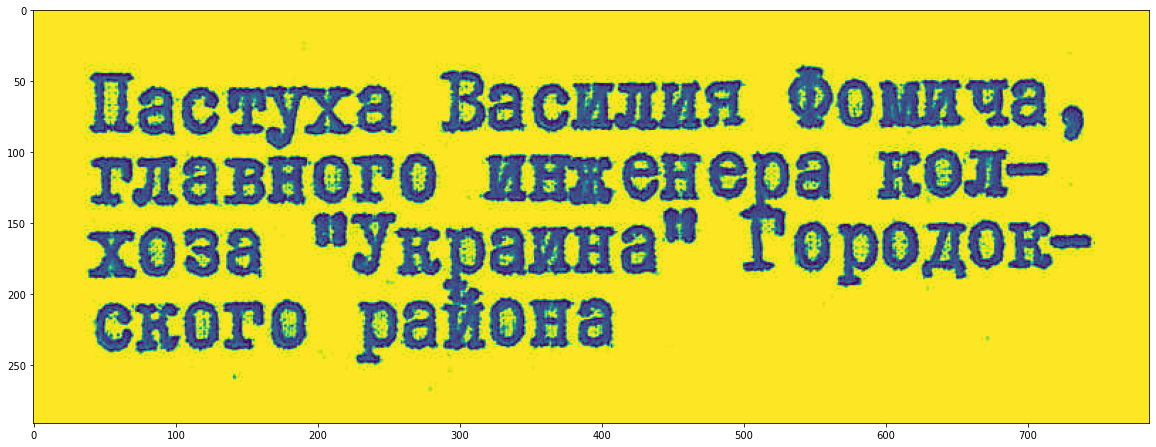

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   2   5   6   8  11  22  23  24  26  30  46  57  85  97
 109 128 133 127 123 125 120 113 113 115 114 114 111 109 108 110 105 105
 103 100 102 103 111 121 137 141 141 146 129 108  87  64  48  30  12   9
   9   7   6   5   5   4   3   2   2   8  22  38  62  91 123 140 143 135
 137 133 123 114 114 111 114 116 120 111 100  96  94  99  98  94  97  96
 106 114 122 127 135 139 123 106  82  59  42  18   6   6  11  14  18  23
  32  35  35  32  30  33  46  57  66  85 108 123 131 132 132 134 127 113
 108 103  98  92  91  94  87  87  90  87  88  89  87  90  97 105 115 120
 125 124 110 100  88  72  44  29  19   8   8  10  11  11   6   5   7   5
   5   6   7   6   7  12  19  33  53  68  76  79  81  78  67  59  50  50
  49  54  60  58  60  58  53  50  50  49  49  51  52  55  60  70  78  80
  78  76  70  54  33  14   6   3   3   5   5   5   

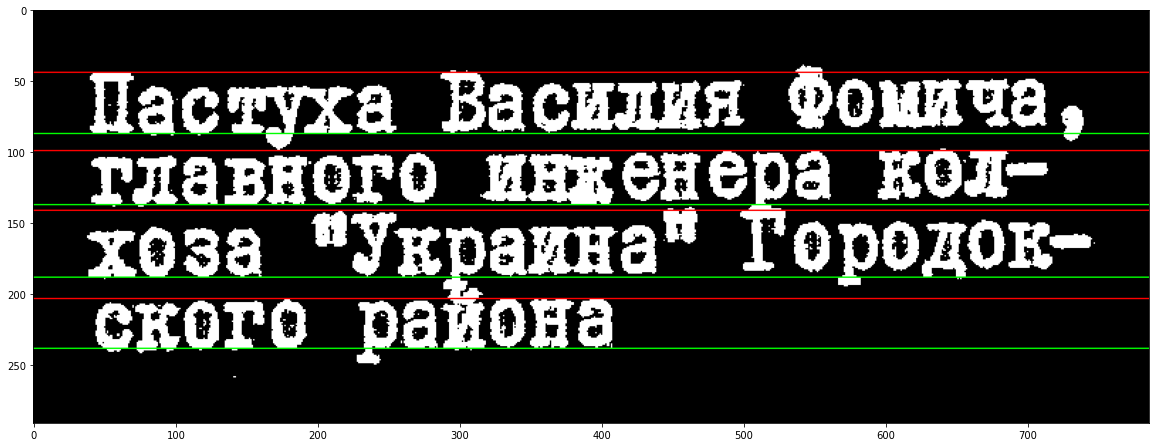

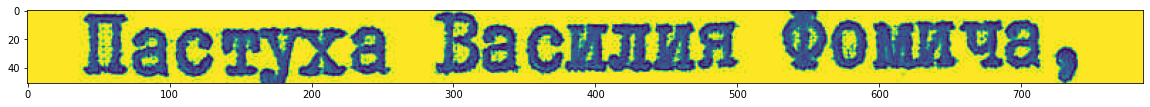

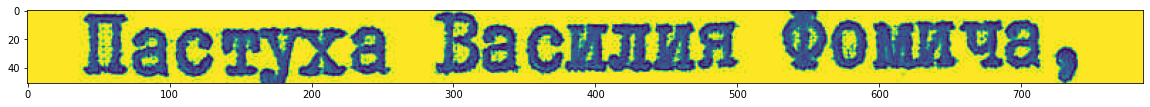

7
['', '', '', '', 'Пастуха', 'Василия', 'Фомича,']
Пастуха Василия Фомича,
Пастуха | 40 | 3 | 216 | 48
Василия | 287 | 1 | 214 | 45
Фомича, | 532 | 0 | 208 | 51


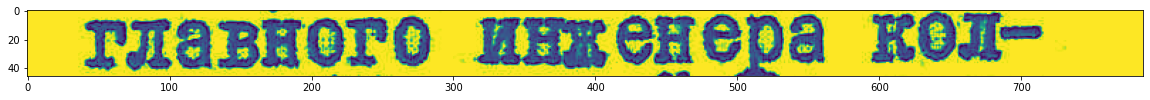

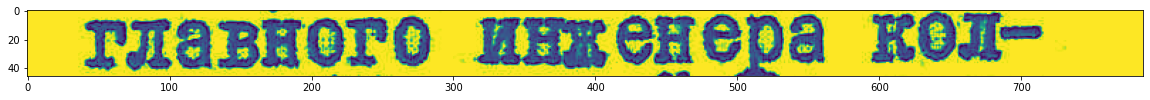

7
['', '', '', '', 'тлавнего', 'ивхенера', 'кКел=']
тлавнего ивхенера кКел=
тлавнего | 41 | 0 | 243 | 46
ивхенера | 315 | 3 | 247 | 43
кКел= | 595 | 1 | 120 | 36


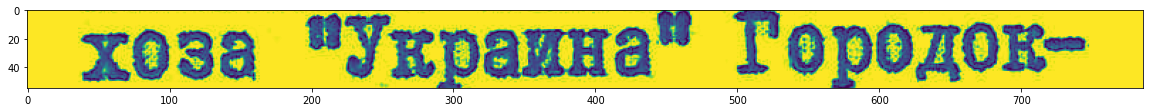

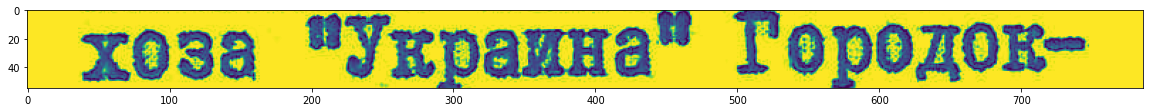

7
['', '', '', '', 'хоза', '"Украина"', 'Городок-']
хоза "Украина" Городок-
хоза | 38 | 14 | 123 | 37
"Украина" | 196 | 1 | 272 | 54
Городок- | 498 | 0 | 248 | 55


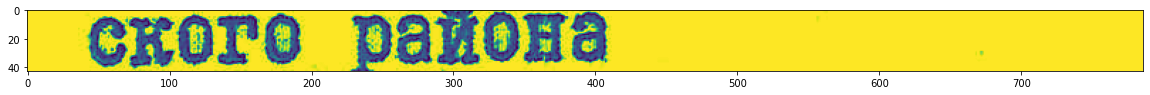

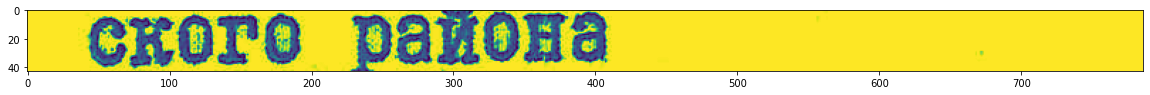

1
['']



In [16]:
ish_img = cv2.imread(name_jpg, 0)
file_text = open('file_text.txt','a')
file_fragment_text = open('file_fragment_text.txt','a')
for coord in list_contur_coord:
    out = copy.copy(ish_img[coord[1]:coord[1]+coord[3]+1, coord[0]:coord[0]+coord[2]+1])
    show_image(out)
    uppers,lowers = string_recog(out)
    for yh,yl in zip(uppers,lowers):
        ssttrr = copy.copy(out[yh-2:yl+6,0:])
        show_image(ssttrr)

#     out = cv2.fastNlMeansDenoisingColored(out,None,10,7,21,None)
#     show_image(out)
#         ssttrr = cv2.cvtColor(ssttrr, cv2.COLOR_BGR2GRAY)
#         ret, ssttrr = cv2.threshold(ssttrr, 120, 255, 0)
#         show_image(ssttrr)
#         kernel = np.ones((5,5),np.uint8)
#         ssttrr = cv2.morphologyEx(ssttrr, cv2.MORPH_OPEN, kernel)
        def_text(ssttrr, file_text, file_fragment_text)
    break
# file_fragment_text.write('new_document\n')
# file_text.write('new_document\n')
# file_text.close()
# file_fragment_text.close()